In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
evaluation_data = pd.read_csv('./results/results_22_02_2022_12_29_00.csv')

# Results Analysis

In [3]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
evaluation_data.head(10)

,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time (s),LastTokenQuery,EquivalenceQuery,OT Prefixes,OT Suffixes,Tree Depth,Inner Nodes,LogProbError,WER,NDCG,OOPartition,OOTolerance,Partitions,Tolerance
0,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,1,63.779548,7323,10,611.0,12.0,NaN,NaN,0.0,0.0,1.0,0,0,10,0.10
1,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,2,64.732444,7323,10,611.0,12.0,NaN,NaN,0.0,0.0,1.0,0,0,10,0.10
2,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,3,64.107118,7323,10,611.0,12.0,NaN,NaN,0.0,0.0,1.0,0,0,10,0.10
3,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,4,65.718510,7323,10,611.0,12.0,NaN,NaN,0.0,0.0,1.0,0,0,10,0.10
4,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,5,64.300232,7323,10,611.0,12.0,NaN,NaN,0.0,0.0,1.0,0,0,10,0.10
5,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,6,64.712837,7323,10,611.0,12.0,NaN,NaN,0.0,0.0,1.0,0,0,10,0.10
6,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,7,64.760339,7323,10,611.0,12.0,NaN,NaN,0.0,0.0,1.0,0,0,10,0.10
7,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,8,64.732902,7323,10,611.0,12.0,NaN,NaN,0.0,0.0,1.0,0,0,10,0.10
8,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,9,64.496670,7323,10,611.0,12.0,NaN,NaN,0.0,0.0,1.0,0,0,10,0.10
9,WLStarLearner,PDFA - b1f7f01c9cd549c1a7c28a1d96567480,291,291,1,98.891423,3006,3,603.0,5.0,NaN,NaN,0.0,0.0,1.0,0,0,100,0.01


In [5]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

funcs =  ['median', IQR]    
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Partitions']).agg({'Time (s)':funcs, 'LastTokenQuery':funcs, 'EquivalenceQuery':funcs, 'LogProbError':funcs,'WER':funcs,'NDCG':funcs,'OOPartition':funcs, 'OOTolerance':funcs})
grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'LogProbError_median','LogProbError_IQR',
'WER_median','WER_IQR','NDCG_median','NDCG_IQR','OOPartition_median','OOPartition_IQR', 'OOTolerance_median','OOTolerance_IQR']
grouped_multiple.reset_index(inplace = True)

In [6]:
grouped_multiple

,Algorithm,Partitions,Time(s)_median,Time(s)_IQR,MembershipQuery_median,MembershipQuery_IQR,EquivalenceQuery_median,EquivalenceQuery_IQR,LogProbError_median,LogProbError_IQR,WER_median,WER_IQR,NDCG_median,NDCG_IQR,OOPartition_median,OOPartition_IQR,OOTolerance_median,OOTolerance_IQR
0,QuantNaryTreeLearner,10,13.917017,1.656648,2830.5,90.0,71.5,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,QuantNaryTreeLearner,100,3.783240,0.634467,1875.0,102.0,9.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,QuantNaryTreeLearner,500,2.712710,0.318346,1809.0,66.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,QuantNaryTreeLearner,1000,2.674106,0.250465,1803.0,66.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,QuantNaryTreeLearner,2000,2.712609,0.245384,1803.0,66.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,QuantNaryTreeLearner,3000,2.771891,0.270662,1803.0,66.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,WLStarLearner,10,65.862588,11.292177,7179.0,665.0,8.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,WLStarLearner,100,111.528107,15.105268,3046.0,200.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,WLStarLearner,500,135.029251,19.295938,2447.0,112.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,WLStarLearner,1000,126.794515,17.780939,1800.0,575.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Learning Time Median (s)')

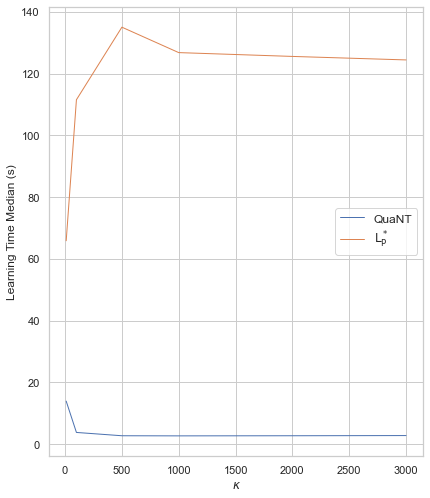

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lineplot(x="Partitions", y="Time(s)_median", hue="Algorithm",
                 data=grouped_multiple, linewidth=1)
plt.legend(labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("$\kappa$", fontsize = 12)
ax.set_ylabel("Learning Time Median (s)", fontsize = 12)